In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

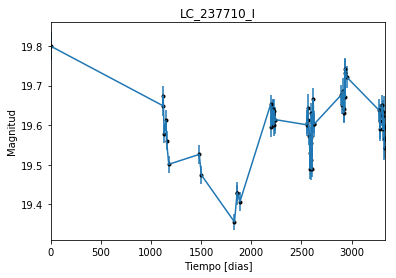

In [2]:
data = np.genfromtxt('LC_237710_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_237710_I')
plt.savefig("LC_237710_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

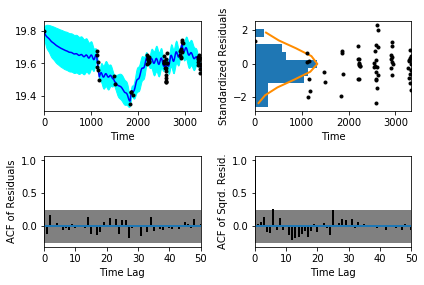

In [5]:
sample.assess_fit()

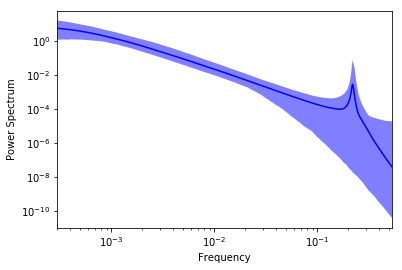

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

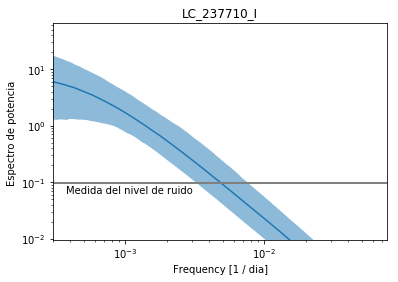

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_237710_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_237710_I')

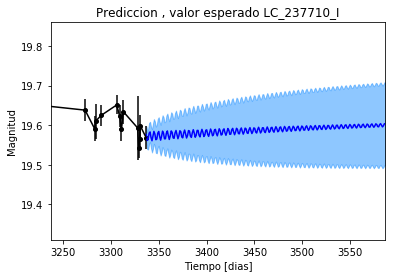

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_237710_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_237710_I')

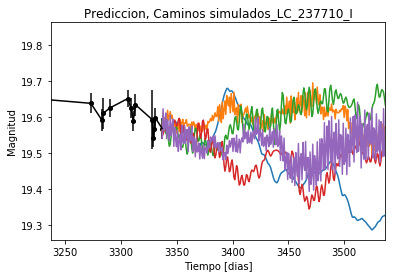

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_237710_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


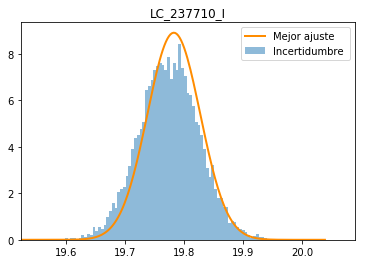

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_237710_I')
plt.savefig("Mejor_ajuste_LC_237710_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_237710_I')

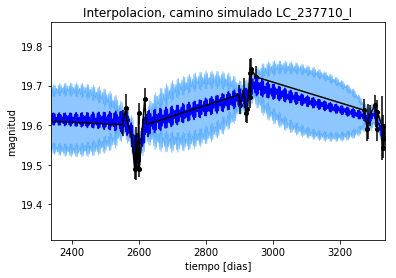

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_237710_I')

Text(0.5,1,'Interpolacion, camino simulado LC_237710_I')

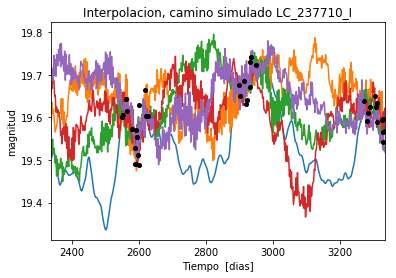

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_237710_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 259.922558508
Median: 0.00205398410053
Standard deviation: 0.0872320759204
68% credibility interval: [ 0.00058569  0.00749877]
95% credibility interval: [ 0.00033294  0.15089012]
99% credibility interval: [  3.10532418e-04   7.48171246e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 551.858973715
Median: 0.00193277736347
Standard deviation: 0.023512348747
68% credibility interval: [ 0.00055569  0.00673439]
95% credibility interval: [ 0.00033294  0.03445137]
99% credibility interval: [ 0.00030908  0.13831209]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 84.1083654332
Median: 0.161000134478
Standard deviation: 0.2401458

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 106.598184346
Median: 128.700878316
Standard deviation: 3.06703622296
68% credibility interval: [ 125.28164789  130.46853947]
95% credibility interval: [ 119.81817251  131.65119678]
99% credibility interval: [ 117.71033621  132.35743956]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 146.88718199
Median: 1.13286409305
Standard deviation: 1.64729397432
68% credibility interval: [ 0.31868247  3.25507934]
95% credibility interval: [ 0.12501115  6.11092127]
99% credibility interval: [ 0.05771604  7.43376925]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 96.4447356853
Median: 2.03666399792
Standard deviation: 8.41053241025
68% credibility interval: [  1.88954552  23.3968493 ]
95% credibility interval: [  0.30212432  24

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.4886056
Median: 7.87474175372e-42
Standard deviation: 7.05118865694e+143
68% credibility interval: [  9.19883373e-89   2.29718939e-07]
95% credibility interval: [  1.93733200e-106   5.59891653e+000]
99% credibility interval: [  3.05724578e-107   7.18292187e+117]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 637.573343865
Median: 19.6115341705
Standard deviation: 0.0586170085187
68% credibility interval: [ 19.56415402  19.67156224]
95% credibility interval: [ 19.51006809  19.74612901]
99% credibility interval: [ 19.4751038   19.80258407]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 88.0226357997
Median: 0.22259798244
Standard deviation: 0.219753173922
68% credibility interval: [ 0.21627619  0.76379602]
95% credibility interval: [ 0.          0.78547203]
99% credibility interval: [ 0.         0.7957078]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 88.0226357997
Median: 0.22259798244
Standard deviation: 0.219753173922
68% credibility interval: [ 0.21627619  0.76379602]
95% credibility interval: [ 0.          0.78547203]
99% credibility interval: [ 0.         0.7957078]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1242.46260305
Median: 0.0
Standard deviation: 0.000154783248973
68% credibilit

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 106.598184346
Median: 128.700878316
Standard deviation: 3.06703622296
68% credibility interval: [ 125.28164789  130.46853947]
95% credibility interval: [ 119.81817251  131.65119678]
99% credibility interval: [ 117.71033621  132.35743956]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 283.575577975
Median: 0.0138197571328
Standard deviation: 0.00762383134739
68% credibility interval: [ 0.00908571  0.02205615]
95% credibility interval: [ 0.00629548  0.03459007]
99% credibility interval: [ 0.00489479  0.04820437]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 255.041598588
Median: 0.908401418727
Standard deviation: 0.193934385365
68% credibility interval: [ 0.75855332  1.11155852]
95% credibility interval: [ 0.63946279  1.41782877]
99% credibility interval: [ 0.58341197  1.64688276]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 101.229116427
Median: 0.0181978485038
Standard deviation: 0.254512884396
68% credibility interval: [ 0.00495174  0.14467097]
95% credibility interval: [  3.65409693e-05   1.00740502e+00]
99% credibility interval: [  7.32135029e-122   1.35500435e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 259.922558508
Median: (-0.0129055627216-4.90916192493j)
Standard deviation: 1.48555672369
68% credibility interval: [-0.04711619-1.29774412j -0.00367999-1.38511514j]
95% credibility interval: [-0.94807060-2.22888171j -0.00209193-1.38128633j]
99% credibility interval: [ -4.70089858e+00+0.j          -1.95113273e-03-1.36501896j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 551.858973715
Median: (-0.0121439983322+1.40745639057j)
Standard deviation: 1.38863069207
68% credibility interval: [-0.04231341+1.39311496j -0.00349151+4.97052014j]
95% credibility interval: [-0.21646436+3.86160851j -0.00209193+1.38128633j]
99% credibility interval: [-0.86904052+0.00207451j -0.00194199+1.36201651j]
Posterior summary for parameter ar